In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [3]:
data=pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

In [4]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
data.shape

(918, 12)

In [6]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
data.replace({'Sex':{'M':0,'F':1}},inplace=True)
data.replace({'ChestPainType':{'ATA':0,'NAP':1,'ASY':2,'TA':3}},inplace=True)
data.replace({'RestingECG':{'Normal':0,'LVH':1,'ST':2}},inplace=True)
data.replace({'ExerciseAngina':{'N':0,'Y':1}},inplace=True)
data.replace({'ST_Slope':{'Up':0,'Flat':1,'Down':2}},inplace=True)

In [10]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,2,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


In [11]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,0,3,110,264,0,0,132,0,1.2,1,1
914,68,0,2,144,193,1,0,141,0,3.4,1,1
915,57,0,2,130,131,0,0,115,1,1.2,1,1
916,57,1,0,130,236,0,1,174,0,0.0,1,1
917,38,0,1,138,175,0,0,173,0,0.0,0,0


In [12]:
data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,1.452070,132.396514,198.799564,0.233115,0.592593,136.809368,0.404139,0.887364,0.638344,0.553377
std,9.432617,0.407701,0.851832,18.514154,109.384145,0.423046,0.793670,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,0.000000,1.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,2.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,0.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [13]:
data['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [14]:
x=data.drop(columns='HeartDisease',axis=1)
y=data['HeartDisease']

In [15]:
print(x)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    0              0        140          289          0           0   
1     49    1              1        160          180          0           0   
2     37    0              0        130          283          0           2   
3     48    1              2        138          214          0           0   
4     54    0              1        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    0              3        110          264          0           0   
914   68    0              2        144          193          1           0   
915   57    0              2        130          131          0           0   
916   57    1              0        130          236          0           1   
917   38    0              1        138          175          0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

In [16]:
print(y)

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64


/tmp/ipykernel_20/1043644215.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


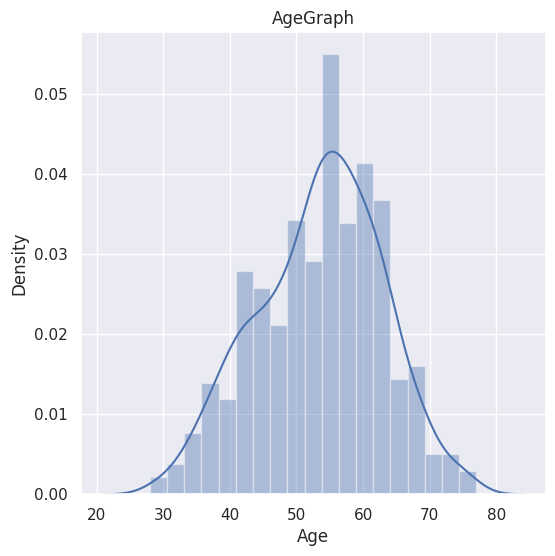

In [17]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['Age'])
plt.title('AgeGraph')
plt.show()

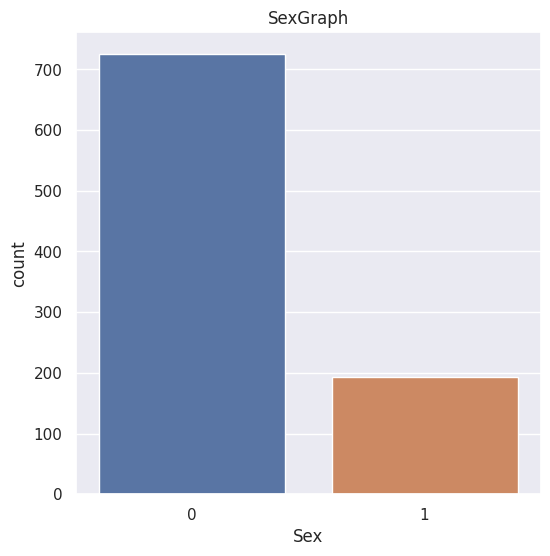

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(x='Sex',data=data)
plt.title('SexGraph')
plt.show()

/tmp/ipykernel_20/4070823255.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ChestPainType'])


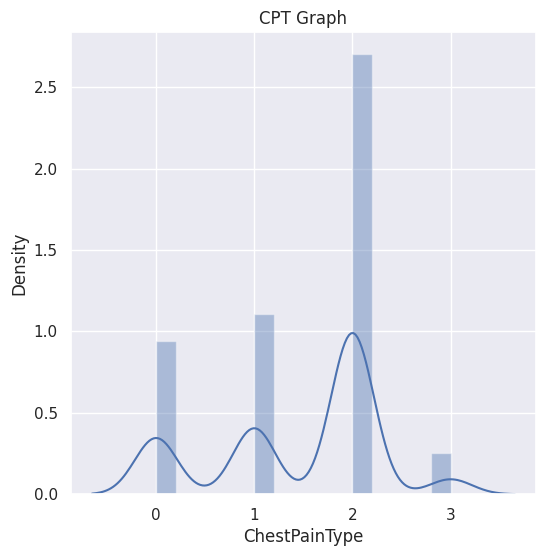

In [19]:
plt.figure(figsize=(6,6))
sns.distplot(data['ChestPainType'])
plt.title('CPT Graph')
plt.show()

/tmp/ipykernel_20/3840489968.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['RestingBP'])


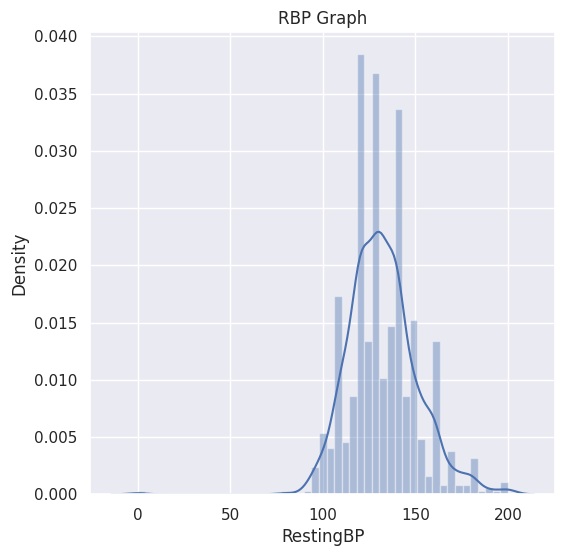

In [20]:
plt.figure(figsize=(6,6))
sns.distplot(data['RestingBP'])
plt.title('RBP Graph')
plt.show()

/tmp/ipykernel_20/3932134218.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Cholesterol'])


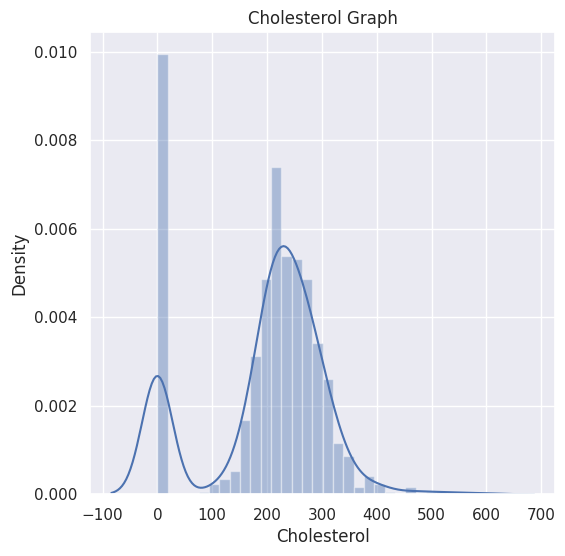

In [21]:
plt.figure(figsize=(6,6))
sns.distplot(data['Cholesterol'])
plt.title('Cholesterol Graph')
plt.show()

/tmp/ipykernel_20/3630896626.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['FastingBS'])


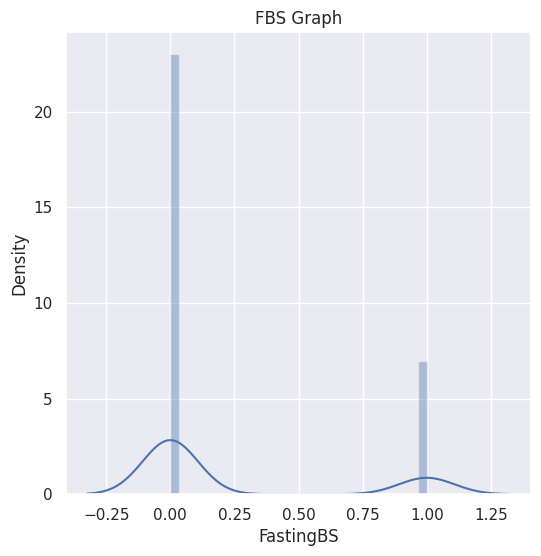

In [22]:
plt.figure(figsize=(6,6))
sns.distplot(data['FastingBS'])
plt.title('FBS Graph')
plt.show()

/tmp/ipykernel_20/2483453539.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['RestingECG'])


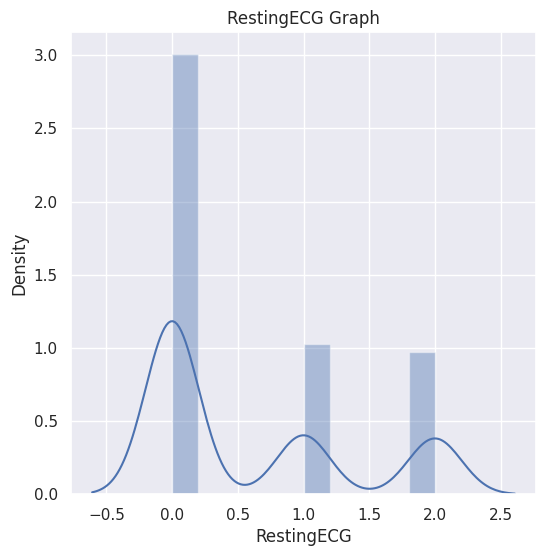

In [23]:
plt.figure(figsize=(6,6))
sns.distplot(data['RestingECG'])
plt.title('RestingECG Graph')
plt.show()

/tmp/ipykernel_20/2068294910.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MaxHR'])


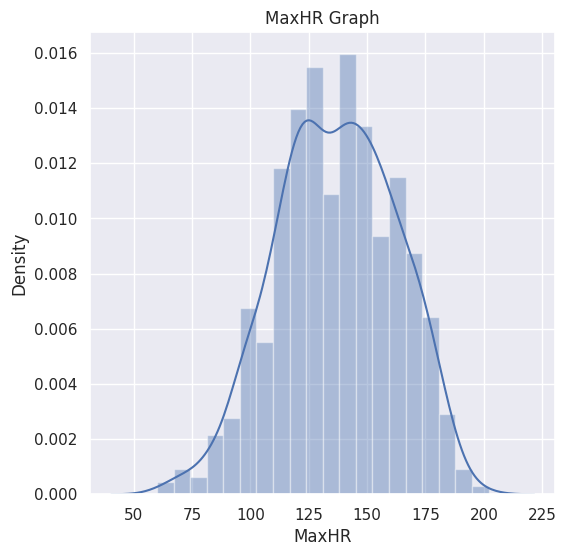

In [24]:
plt.figure(figsize=(6,6))
sns.distplot(data['MaxHR'])
plt.title('MaxHR Graph')
plt.show()

/tmp/ipykernel_20/3149280101.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ExerciseAngina'])


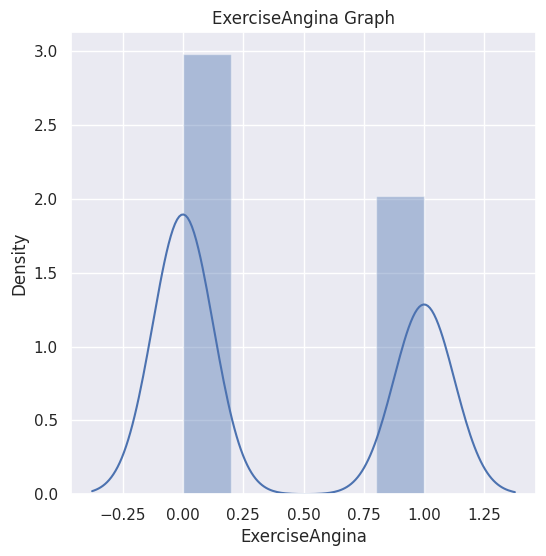

In [25]:
plt.figure(figsize=(6,6))
sns.distplot(data['ExerciseAngina'])
plt.title('ExerciseAngina Graph')
plt.show()

/tmp/ipykernel_20/1527457554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Oldpeak'])


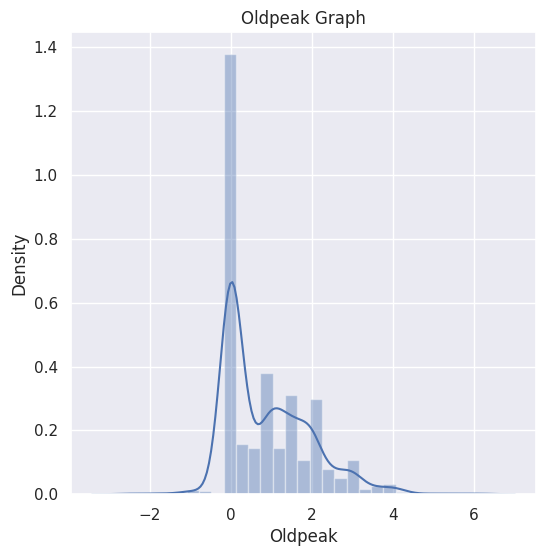

In [26]:
plt.figure(figsize=(6,6))
sns.distplot(data['Oldpeak'])
plt.title('Oldpeak Graph')
plt.show()

/tmp/ipykernel_20/2592715348.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ST_Slope'])


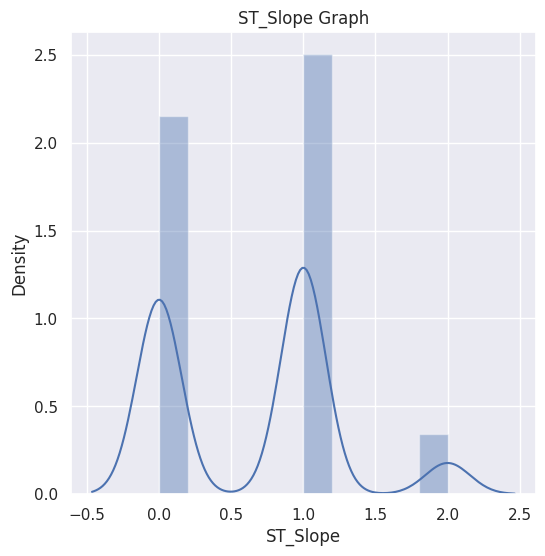

In [27]:
plt.figure(figsize=(6,6))
sns.distplot(data['ST_Slope'])
plt.title('ST_Slope Graph')
plt.show()

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [29]:
print(x.shape,x_train.shape,x_test.shape)

(918, 11) (734, 11) (184, 11)


In [30]:
model=LogisticRegression()

In [31]:
model.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [33]:
print('accuracy on training data :',training_data_accuracy)

accuracy on training data : 0.8542234332425068


In [34]:
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [35]:
print('accuracy on testing data :',test_data_accuracy)

accuracy on testing data : 0.8369565217391305


In [36]:
input_data=(45,0,3,110,264,0,0,132,0,1.2,1)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
    print('The Person Does Not Have Heart Disease')
else:
    print('The Person Has Heart Disease')

[1]
The Person Has Heart Disease


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [37]:
input_data=(40,0,0,140,289,0,0,172,0,0.0,0)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)


if(prediction[0]==0):
    print('The Person Does Not Have Heart Disease')
else:
    print('The Person Has Heart Disease')

[0]
The Person Does Not Have Heart Disease


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [38]:
y_train

735    1
21     0
791    1
374    1
675    0
      ..
315    1
759    1
340    1
849    0
530    1
Name: HeartDisease, Length: 734, dtype: int64

In [39]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [40]:
svm=SVR()
svm.fit(x_train,y_train)
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
gr=GradientBoostingRegressor()
gr.fit(x_train,y_train)

GradientBoostingRegressor()

In [41]:
y_pred1=svm.predict(x_test)
y_pred2=rf.predict(x_test)
y_pred3=gr.predict(x_test)
df1=pd.DataFrame({'Actual':y_test,'svm':y_pred1,'rf':y_pred2,'gr':y_pred3})

In [42]:
df1

,Actual,svm,rf,gr
821,0,0.310360,0.45,-0.035642
748,1,0.979495,0.97,0.978324
797,1,0.114898,0.14,0.194499
396,1,0.900335,0.72,0.691968
486,0,-0.047331,0.04,0.056423
...,...,...,...,...
276,1,0.334188,0.71,0.583658
197,0,0.495318,0.00,0.036114
454,1,0.638829,0.99,0.978185
77,0,0.236167,0.06,0.007360


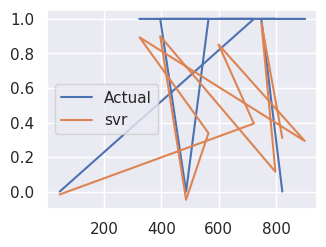

In [43]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svr")
plt.tight_layout()
plt.legend()

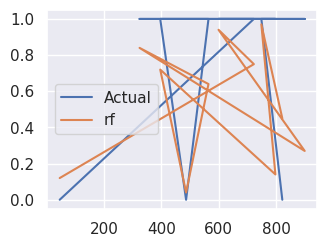

In [44]:
plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.tight_layout()
plt.legend()

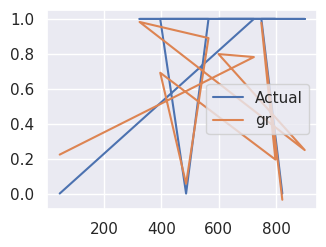

In [45]:
plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")
plt.tight_layout()
plt.legend()

In [46]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)

In [47]:
print(score1,score2,score3)

0.25049868623901705 0.6062171209947393 0.616315559028287


In [48]:
s1=metrics.mean_absolute_error(y_test,y_pred1)
s2=metrics.mean_absolute_error(y_test,y_pred2)
s3=metrics.mean_absolute_error(y_test,y_pred3)

In [49]:
print(s1,s2,s3)

0.33888695436624117 0.19706521739130436 0.20249475229971328


In [50]:
data={'Age':40,
     'Sex':0,
     'ChestPainType':0,
     'RestingBP':140,
     'Cholesterol':289,
     'FastingBS':0,
     'RestingECG':0,
     'MaxHR':172,
     'ExerciseAngina':0,
     'Oldpeak':0.0,
     'ST_Slope':0}
df=pd.DataFrame(data,index=[0])
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,0,140,289,0,0,172,0,0.0,0


In [51]:
new_pred=gr.predict(df)
print(new_pred)

[0.03750296]


In [52]:
data={'Age':40,
     'Sex':0,
     'ChestPainType':0,
     'RestingBP':140,
     'Cholesterol':289,
     'FastingBS':0,
     'RestingECG':0,
     'MaxHR':172,
     'ExerciseAngina':0,
     'Oldpeak':0.0,
     'ST_Slope':0}
df=pd.DataFrame(data,index=[0])
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,0,140,289,0,0,172,0,0.0,0


In [53]:
new_pred=rf.predict(df)
print(new_pred)

[0.01]


In [54]:
data={'Age':40,
     'Sex':0,
     'ChestPainType':0,
     'RestingBP':140,
     'Cholesterol':289,
     'FastingBS':0,
     'RestingECG':0,
     'MaxHR':172,
     'ExerciseAngina':0,
     'Oldpeak':0.0,
     'ST_Slope':0}
df=pd.DataFrame(data,index=[0])
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,0,140,289,0,0,172,0,0.0,0


In [55]:
new_pred=svm.predict(df)
print(new_pred)

[0.08564211]


In [56]:
gr=GradientBoostingRegressor()
gr.fit(x,y)

GradientBoostingRegressor()

In [57]:
import joblib

In [58]:
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [59]:
model1=joblib.load('model_joblib_gr')

In [60]:
model1.predict(df)

array([0.07771873])

In [61]:
rf=RandomForestRegressor()
rf.fit(x,y)

RandomForestRegressor()

In [62]:
joblib.dump(rf,'model_joblib_rf')

['model_joblib_rf']

In [63]:
model2=joblib.load('model_joblib_rf')

In [64]:
model2.predict(df)

array([0.])

In [65]:
svm= SVR()
svm.fit(x,y)

SVR()

In [66]:
joblib.dump(svm,'model_joblib_svm')

['model_joblib_svm']

In [67]:
model3=joblib.load('model_joblib_svm')

In [68]:
model3.predict(df)

array([0.09220859])